#  [실습] CNN - 전이학습_임의의 이미지 예측

# VGG16 모델
- backbone으로 가장 많이 사용된다.
- 2014년에 ILSVRC에서 2등 한 모델이다. 1등은 구글에서 했지만, 더 많이 사용한다.
- 특이한 것이 없는 일반적인 CNN이다.
- CNN과 동일하게 convolution layer와 max pooling later가 있다.
- 21개의 layer를 갖고 weight 는 1억 4천 개
- pooling 레이어를 제외하고 모두 16개의 레이어가 있다.

In [1]:
import tensorflow as tf
from tensorflow import keras

In [1]:
from keras.applications.vgg16 import VGG16
model = VGG16()

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2023-02-23 15:36:51.017253: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-02-23 15:36:51.017565: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

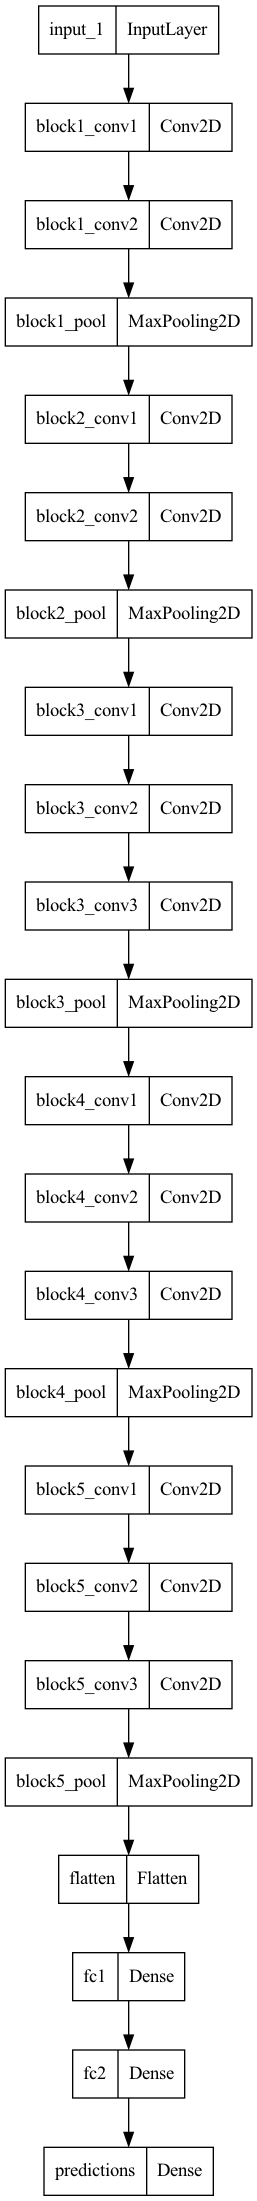

In [2]:
from keras.utils.vis_utils import plot_model

print(model.summary())
plot_model(model, to_file='vgg16.png')

In [3]:
from keras.utils import load_img, img_to_array
from keras.applications.vgg16 import preprocess_input


In [8]:
img = load_img('../laptop.png', target_size=(224,224))
img = img_to_array(img)
print(img.shape)

# (1, 224, 224, 3)
img = img.reshape(1, 224, 224, 3)
print(img.shape)

(224, 224, 3)
(1, 224, 224, 3)


In [9]:
img = preprocess_input(img)

In [19]:
import numpy as np
np.set_printoptions(suppress=True)

from keras.applications.vgg16 import decode_predictions

y_pred_proba = model.predict(img)
label = decode_predictions(y_pred_proba)
print(label[0][0][1])
print(label[0][0][2])

1/1 [==============================] - 0s 14ms/step
notebook
0.38674882
